# Data wrangling Project

### Importing the different libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## A. Importing, cleaning and numerical summaries

### Import the data as a pandas DataFrame

In [3]:
data = pd.read_csv("data.csv",na_values=0)

### Check the number of observations

In [4]:
num_obs = len(data)
print("There are {} observations.".format(num_obs))

There are 153 observations.


### Obtain the column headings.

In [5]:
data.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

### Check the data type for each column.

In [6]:
pd.DataFrame(data.dtypes)

,0
Country,object
Happiness Rank,int64
Happiness Score,float64
Economy,float64
Family,float64
Health,float64
Freedom,float64
Generosity,float64
Corruption,float64
Dystopia,float64


### Check if there are any missing values.

In [7]:
data.isnull().sum().values.any()

True

### Removed the missing values

In [8]:
data.dropna(inplace=True)

### Obtain the mean, minimum and maximum value for each column containing numerical data.

In [9]:
data.describe().loc[["mean","min","max"]]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,76.308219,5.399548,0.992581,1.199751,0.558807,0.417253,0.247376,0.125244,1.858491,75.465068
min,1.000000,2.905000,0.022643,0.396103,0.005565,0.014996,0.010165,0.004388,0.377914,44.800000
max,154.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


### The 10 happiest countries, ordered by their happiness score

In [10]:
data.set_index("Country",inplace=True)

In [11]:
top_ten = data.sort_values(["Happiness Score"],ascending=False).head(10)
top_ten

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


### The 10 least happy countries, ordered by their happiness score.

In [12]:
data.sort_values(["Happiness Score"]).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


## Indexing and grouping  

### First grouping the data by region.

Renaming the regions for the .csv files 

In [13]:
data_for_csv = pd.DataFrame(data.replace(["Western Europe","Africa","Asia-Pacific","Eastern Europe","Latin America","North America","Europe"],
                                   ["west_europe","africa","asia_pacific","east_europe","latin_america","north_america","europe"]))

In [14]:
grouped_for_csv = data_for_csv.groupby("Region")

Then getting the list of groups so I can iterate on the region names.

In [15]:
list_groups = list(grouped_for_csv.groups)

Making now a loop to make a csv file for each group

In [16]:
for group in list_groups:
    grouped_for_csv.get_group(group).to_csv(group+".csv")

### Compute the mean happiness score for each region and rank the regions from most happy to least happy

In [17]:
grouped = data.groupby("Region")

In [18]:
pd.DataFrame(grouped["Happiness Score"].mean().sort_values(ascending=False))

,Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.529947
Asia-Pacific,5.358326
Africa,4.316275
Europe,4.096000


### Compute the number of countries in each region that have a happiness score above 6.0.

In [19]:
happy_data = data[data["Happiness Score"]>6]

In [20]:
pd.DataFrame(happy_data.groupby("Region")["Happiness Score"].count())

,Happiness Score
Region,
Asia-Pacific,11
Eastern Europe,1
Latin America,13
North America,2
Western Europe,17


### Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [21]:
pd.DataFrame(grouped["Happiness Score"].max()-grouped["Happiness Score"].min()).sort_values("Happiness Score",ascending=False)

,Happiness Score
Region,
Asia-Pacific,3.852
Latin America,3.476
Africa,2.967
Western Europe,2.342
Eastern Europe,1.454
North America,0.323
Europe,0.000


Asia-Pacific has the largest range of happiness scores.   
Europe has 0 because it only has Ukraine as data.

##  Bar plot of the Happiness Score

### Horizontal bar plot of the Happiness Score of the top 10 happiest countries

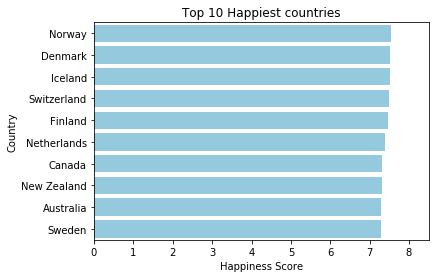

In [22]:
sns.barplot(top_ten["Happiness Score"],top_ten.index,color="skyblue")
plt.title("Top 10 Happiest countries")
plt.xlim(0,8.5);

### Stacked bar chart

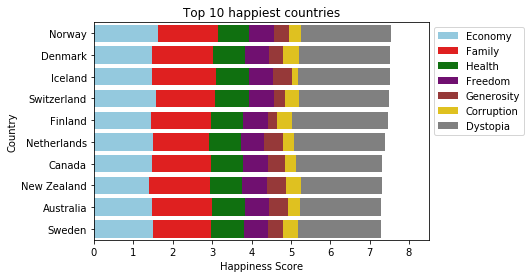

In [23]:
sns.barplot(top_ten["Economy"],top_ten.index,color="skyblue",label="Economy")
sns.barplot(top_ten["Family"],top_ten.index,color="red",left = top_ten["Economy"],label="Family")
sns.barplot(top_ten["Health"],top_ten.index,color="green",left = top_ten["Economy"]+top_ten["Family"],label="Health")
sns.barplot(top_ten["Freedom"],top_ten.index,color="purple",left = top_ten["Economy"]+top_ten["Family"]+top_ten["Health"],label="Freedom")
sns.barplot(top_ten["Generosity"],top_ten.index,color="brown",left = top_ten["Economy"]+top_ten["Family"]+top_ten["Health"]+top_ten["Freedom"],label="Generosity")
sns.barplot(top_ten["Corruption"],top_ten.index,color="gold",left = top_ten["Economy"]+top_ten["Family"]+top_ten["Health"]+top_ten["Freedom"]+top_ten["Generosity"],label="Corruption")
sns.barplot(top_ten["Dystopia"],top_ten.index,color="gray",left = top_ten["Economy"]+top_ten["Family"]+top_ten["Health"]+top_ten["Freedom"]+top_ten["Generosity"]+top_ten["Corruption"],label="Dystopia")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Top 10 happiest countries")
plt.xlabel("Happiness Score")
plt.xlim(0,8.5);

In [24]:
africa = data[data["Region"]=="Africa"].sort_values("Happiness Score",ascending=False)

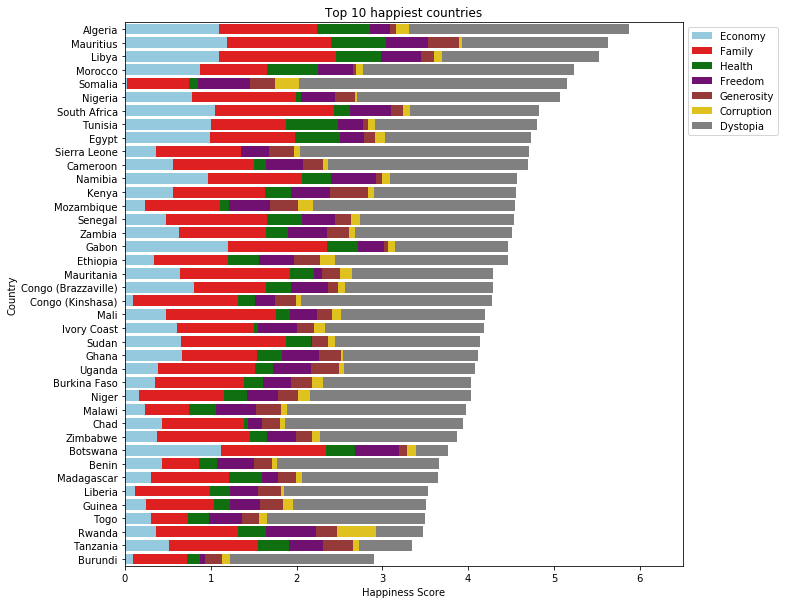

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(africa["Economy"],africa.index,color="skyblue",label="Economy")
sns.barplot(africa["Family"],africa.index,color="red",left = africa["Economy"],label="Family")
sns.barplot(africa["Health"],africa.index,color="green",left = africa["Economy"]+africa["Family"],label="Health")
sns.barplot(africa["Freedom"],africa.index,color="purple",left = africa["Economy"]+africa["Family"]+africa["Health"],label="Freedom")
sns.barplot(africa["Generosity"],africa.index,color="brown",left = africa["Economy"]+africa["Family"]+africa["Health"]+africa["Freedom"],label="Generosity")
sns.barplot(africa["Corruption"],africa.index,color="gold",left = africa["Economy"]+africa["Family"]+africa["Health"]+africa["Freedom"]+africa["Generosity"],label="Corruption")
sns.barplot(africa["Dystopia"],africa.index,color="gray",left = africa["Economy"]+africa["Family"]+africa["Health"]+africa["Freedom"]+africa["Generosity"]+africa["Corruption"],label="Dystopia")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Top 10 happiest countries")
plt.xlabel("Happiness Score")
plt.xlim(0,6.5);

## Histogram of Job Satisfaction

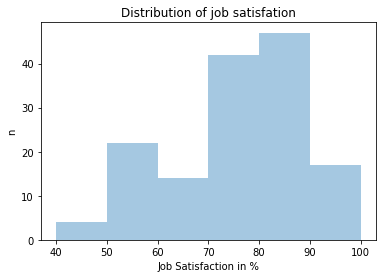

In [26]:
sns.distplot(data["Job Satisfaction"],kde=False,bins = [40,50,60,70,80,90,100])
plt.title("Distribution of job satisfation")
plt.xlabel("Job Satisfaction in %")
plt.ylabel("n");

## Pairwise Scatter plots

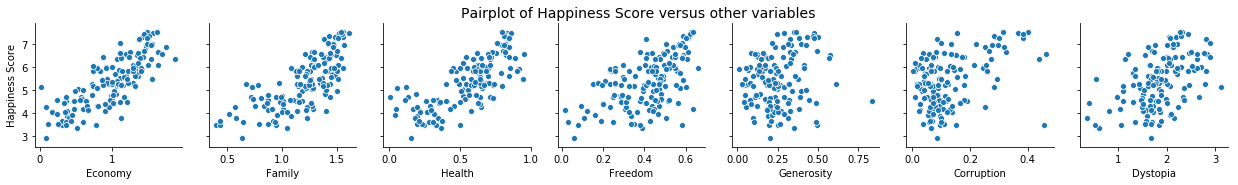

In [27]:
sns.pairplot(data,y_vars=["Happiness Score"],x_vars=["Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia"])
plt.title("Pairplot of Happiness Score versus other variables",x=-3,size=14);

## Correlation

### Correlation between the Happiness Score and each of the other variables

In [28]:
correlations = pd.DataFrame(data.corr().loc["Happiness Score"].drop(["Happiness Rank","Happiness Score"]).sort_values(ascending=False))
correlations

,Happiness Score
Job Satisfaction,0.824810
Economy,0.804390
Health,0.769818
Family,0.748542
Freedom,0.568870
Dystopia,0.493069
Corruption,0.438540
Generosity,0.158920


In [29]:
print("The variable with the highest correlation with the happiness score is "
      +correlations.index[0]+" with a correlation of "+str(np.round(correlations.values[0][0],4)))

The variable with the highest correlation with the happiness score is Job Satisfaction with a correlation of 0.8248


## Probabilities
### Probability that randomly selected country with Happiness score over 6.0 is from Western Europe  

We need to do $$P(West Europe|Happy > 6) = \frac{P(West Europe \cap Happy > 6)}{P(Happy > 6)}$$  

So first we get the probability of the nominator by dividing the number of happy countries from western europe by the total of observations. 
Then we get the denominator probability which is just the number of happy countries divided by the total of observations.  
Finally we divide nominator and denominator to get the conditional probability.

In [30]:
double_filtered = data[(data["Happiness Score"]>6)&(data["Region"]=="Western Europe")]

numerator_count = double_filtered["Happiness Score"].count()

total_count = data["Happiness Score"].count()

p_numerator = numerator_count/total_count

In [31]:
filtered = data[data["Happiness Score"]>6]

denominator_count = filtered["Happiness Score"].count()

p_denominator = denominator_count/total_count

In [32]:
p = p_numerator/p_denominator

print("The probability of a country being from West Europe knowing it has a happiness score higher than 6 is : "+str(np.round(p,4)))

The probability of a country being from West Europe knowing it has a happiness score higher than 6 is : 0.3864


## Matrices
### Define a matrix whose rows correspond to countries and the columns to the regions. 
I tried doing a for loop but I got stuck. But I know about pivoting tables from R so I looked it up for pandas and got this.  
I first get a wide table by using the regions as columns and its values is itself so I get a bunch of region names and NaN values.  
Then I use the `notna()` to have boolean values that I can then transform to 1 and 0 and then I convert all this to a matrix with `.to_numpy()`


In [33]:
wide_table = pd.DataFrame(data.Region).pivot(columns="Region",values="Region")

In [34]:
wide_table.notna().astype(int).to_numpy()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [47]:
# ou bien
pd.get_dummies(data.Region)


,Africa,Asia-Pacific,Eastern Europe,Europe,Latin America,North America,Western Europe
Country,,,,,,,
Malta,0,0,0,0,0,0,1
Zimbabwe,1,0,0,0,0,0,0
Cyprus,0,0,1,0,0,0,0
Iran,0,1,0,0,0,0,0
Mexico,0,0,0,0,1,0,0
New Zealand,0,1,0,0,0,0,0
Poland,0,0,1,0,0,0,0
Egypt,1,0,0,0,0,0,0
Senegal,1,0,0,0,0,0,0
